In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.api as sm

In [ ]:
# Import data that have the dummy variables. This dataframe is used in regression analysis
df1=pd.read_csv(r'extracted_data_parmigiana 1.csv')
# View dataframe
print(df1)

    Unnamed: 0  Black  White  Grey  Red  Blue  Similarity  Confidence
0            0    1.0    0.0   0.0  0.0   0.0   99.995094   99.997391
1            1    0.0    0.0   0.0  0.0   1.0   99.998070   99.995354
2            2    0.0    0.0   1.0  0.0   0.0   99.996719   99.996658
3            3    0.0    0.0   0.0  1.0   0.0   99.996651   99.997841
4            4    0.0    1.0   0.0  0.0   0.0   99.997421   99.995979
5            0    1.0    0.0   0.0  0.0   0.0   99.984108   99.996689
6            1    0.0    0.0   0.0  0.0   1.0   99.937988   99.999214
7            2    0.0    0.0   1.0  0.0   0.0   99.972763   99.999008
8            3    0.0    0.0   0.0  1.0   0.0   99.985275   99.998367
9            4    0.0    1.0   0.0  0.0   0.0   99.984062   99.997139
10           0    1.0    0.0   0.0  0.0   0.0   99.921310   99.996613
11           1    0.0    0.0   0.0  0.0   1.0   99.957176   99.993935
12           2    0.0    0.0   1.0  0.0   0.0   99.898773   99.996948
13           3    0.

In [ ]:
# Import data for data visualization
df=pd.read_csv(r'extracted_data_parmigiana.csv')
# View dataframe
print(df)

   Unnamed: 0          Name   Simi_Red  ...  Conf_Black  Simi_Grey  Conf_Grey
0           0         Allen  99.996651  ...   99.997391  99.996719  99.996658
1           0  Emilia's mom  99.985275  ...   99.996689  99.972763  99.999008
2           0        Emilia  99.847069  ...   99.996613  99.898773  99.996948
3           0          Rose  99.985085  ...   99.995331  99.991684  99.997536
4           0         Yijun  99.917709  ...   99.999069  99.782242  99.990891

[5 rows x 12 columns]


##**Regression Analysis**

Let X represent the independent variables, Y1 represent similarity scores, and Y2 represent confidence scores

In [ ]:
X = df1[['Black','White','Grey','Blue','Red']]
Y1 = df1['Similarity']
Y2 = df1['Confidence']

**Linear Regression of colors on similarity scores**

In [ ]:
olsmod = sm.OLS(Y1, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:             Similarity   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.174
Method:                 Least Squares   F-statistic:                    0.1098
Date:                Thu, 19 Nov 2020   Prob (F-statistic):              0.978
Time:                        00:51:49   Log-Likelihood:                 31.765
No. Observations:                  25   AIC:                            -53.53
Df Residuals:                      20   BIC:                            -47.44
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Black         99.9242      0.034   2942.728      0.0

Here we are using the OLS estimator to analyze the linear regression between colors and similarities. The R squared is 0.021, which means that colors have little effect on similarities. While comparing coefficient between colors, Blue has the highest coefficient which represent that it has the hugest effect on similarities. It seems like clothing color does not have a lot of effect on the rekognition detector. 

Because our small sample size and R-squared value, we ploted a series of histograms for different clothing colors and similarity scores:

Text(0.06, 0.5, 'Frequency')

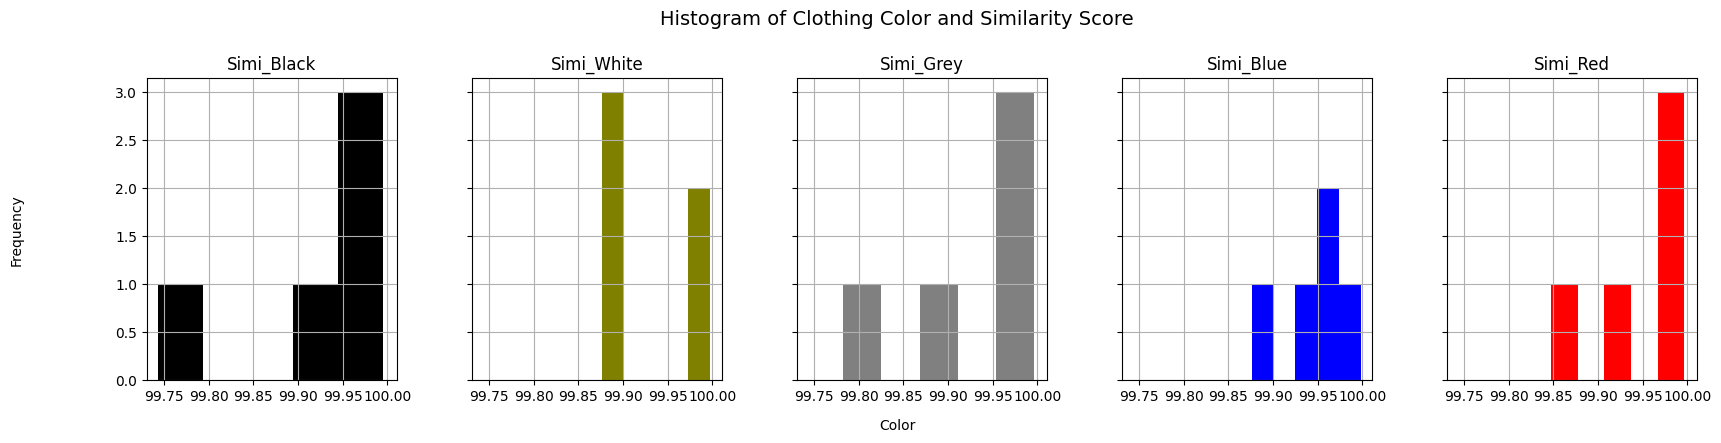

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20,4),dpi=100, sharex=True, sharey=True)

df.hist('Simi_Black', bins=5, ax=axes[0],color='black')
df.hist('Simi_White', bins=5, ax=axes[1],color='olive')
df.hist('Simi_Grey', bins=5, ax=axes[2],color='grey')
df.hist('Simi_Blue', bins=5, ax=axes[3],color='blue')
df.hist('Simi_Red', bins=5, ax=axes[4],color='red')

plt.suptitle('Histogram of Clothing Color and Similarity Score', y=1.05, size=14)
fig.text(0.5, 0.01, 'Color', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')


We can see that the distribution of our samples isn't normal, so this helps explain why our R-squared result is very small.

**Regression of colors on confidence scores**

In [ ]:
olsmod = sm.OLS(Y2, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:             Confidence   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     1.500
Date:                Thu, 19 Nov 2020   Prob (F-statistic):              0.240
Time:                        02:27:35   Log-Likelihood:                 115.46
No. Observations:                  25   AIC:                            -220.9
Df Residuals:                      20   BIC:                            -214.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Black         99.9970      0.001   8.37e+04      0.0

R-squared is 0.271, which suggests that the relationship between colors and confidence scores this weak. 

Because our small sample size and R-squared value, we ploted a series of histograms for different clothing colors and confidence scores:

Text(0.06, 0.5, 'Frequency')

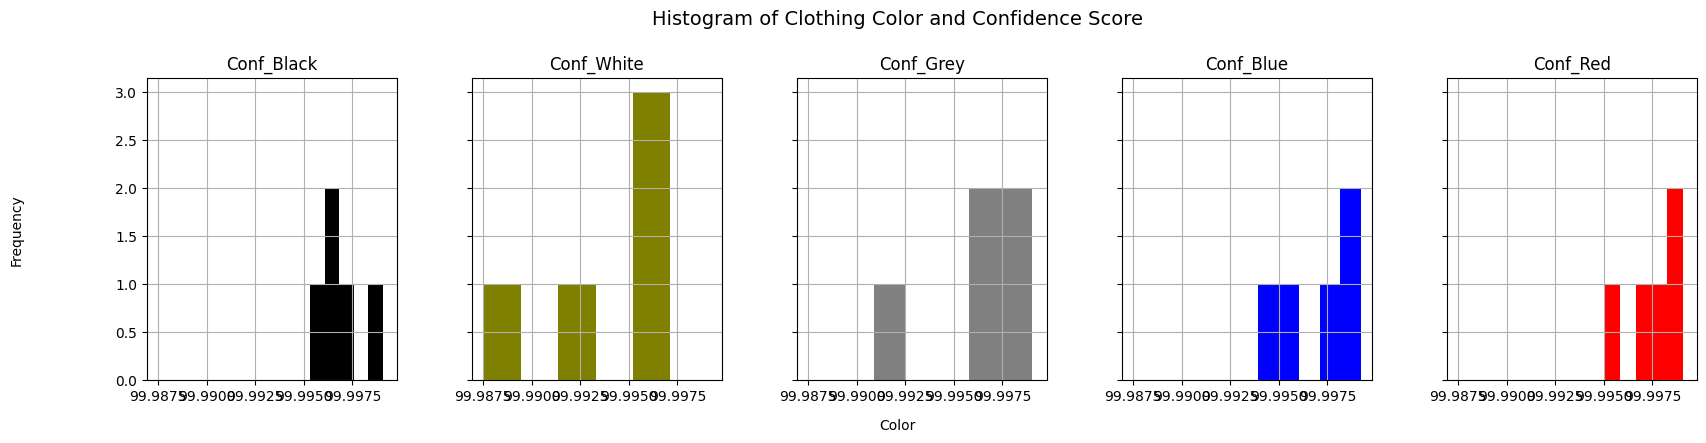

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20,4),dpi=100, sharex=True, sharey=True)
df.hist('Conf_Black', bins=5, ax=axes[0],color='black')
df.hist('Conf_White', bins=5, ax=axes[1],color='olive')
df.hist('Conf_Grey', bins=5, ax=axes[2],color='grey')
df.hist('Conf_Blue', bins=5, ax=axes[3],color='blue')
df.hist('Conf_Red', bins=5, ax=axes[4],color='red')


plt.suptitle('Histogram of Clothing Color and Confidence Score', y=1.05, size=14)
fig.text(0.5, 0.01, 'Color', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

We can see that the distribution of our samples isn't normal as well in this case, so this helps explain why our R-squared result is very small.

#**Data Visualization**

##**Clothing Color vs. Similarity Score**

First, we need to create a list of similarity scores with different clothing colors:

In [ ]:
data=list([df['Simi_Red'],df['Simi_Blue'],df['Simi_Black'],df['Simi_White'],df['Simi_Grey']])

Then, we set the figure size, create axes instance, and plot five box plots in one graph.

[Text(0, 0, 'Red'),
 Text(0, 0, 'Blue'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'White'),
 Text(0, 0, 'Grey')]

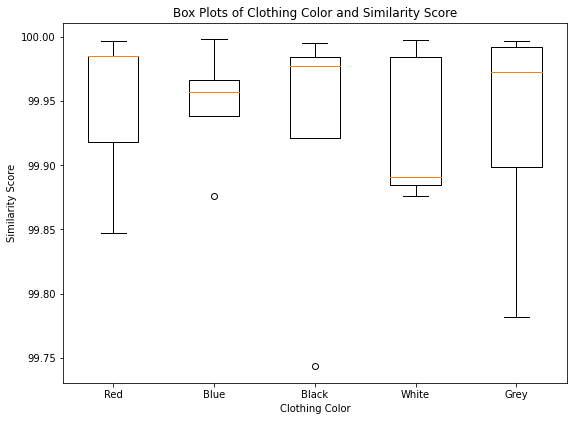

In [ ]:
# Set figure size
fig = plt.figure(figsize =(7, 5)) 
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
# Plot box pot
plt.boxplot(data)
ax.set_title('Box Plots of Clothing Color and Similarity Score')
ax.set_xlabel('Clothing Color')
ax.set_ylabel('Similarity Score')
xticklabels=['Red', 'Blue', 'Black', 'White','Grey']
ax.set_xticklabels(xticklabels)

As shown above, when a person wears RED, AWS Rekognition will return the highest median similarity score. We recommend people to wear red if they are taking an ID photo. Among the 5 most common clothing colors, blue, black, red, white, and grey, red colored clothing does not impact AWS Rekognition's ability to detect faces that much.

In contrast, when a person wears WHITE, AWS Rekognition will return the lowest median similarity score. We do not recommend people 

##**Clothing Color vs. Confidence Score**

Repeat the steps above. However, this time, we are focusing on the confidence scores

In [ ]:
data_conf=list([df['Conf_Red'],df['Conf_Blue'],df['Conf_Black'],df['Conf_White'],df['Conf_Grey']])

[Text(0, 0, 'Red'),
 Text(0, 0, 'Blue'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'White'),
 Text(0, 0, 'Grey')]

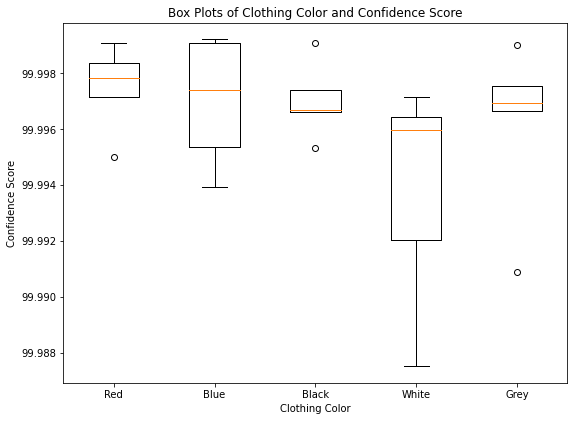

In [ ]:
# Set figure size
fig = plt.figure(figsize =(7, 5)) 
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
# Plot box pot
plt.boxplot(data_conf)
ax.set_title('Box Plots of Clothing Color and Confidence Score')
ax.set_xlabel('Clothing Color')
ax.set_ylabel('Confidence Score')
xticklabels=['Red', 'Blue', 'Black', 'White','Grey']
ax.set_xticklabels(xticklabels)

As shown above, AWS Rekognition has the highest confidence score for RED and the lowest confidence score for WHITE. This finding is closely related to our finding when we compared the similarity scores of different clothing color. 

AWS Rekognition is most confident with facial detection when the person wears red, and it is least confidence with facial detection when the person wears white. 